In [2]:
import pandas as pd
import numpy as np
import ast
from datetime import datetime
import json
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
def convertir_a_anio(fecha_str):
    if pd.notnull(fecha_str):
        try:
            fecha_convertida = datetime.strptime(fecha_str, '%Y-%m-%d')
            anio = str(fecha_convertida.year)
            return anio
        except ValueError:
            return pd.NaT 
    else:
        return pd.NaT 

In [4]:
def analyze_sentiment(row):
    text = row['review']
    recommend = row['recommend']

    if pd.isnull(text):
        return 1  # Neutral si no hay reseña

    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity

    if polarity < -0.1 or (not recommend and polarity < 0.1):
        return 0  # Malo
    elif polarity > 0.1 or (recommend and polarity > -0.1):
        return 2  # Positivo
    else:
        return 1  # Neutral

In [4]:
#Convierto el archivo json en una lista de python por lineas. Para poder abrirlo

#lineas_js = []
#with open('./src/user_reviews.json', encoding='utf-8') as f:
#  for line in f.readlines():
#       lineas_js.append(ast.literal_eval(line))

#df_reviews = pd.DataFrame(lineas_js)

# Creo nuevas columnas basadas en las keys de las reviews
#for key in df_reviews['reviews'][0][0]:
    #df_reviews[key] = df_reviews['reviews'].apply(lambda x: x[0][key] if x #else None)

# Elimino la columna 'reviews' original
#df_reviews.drop('reviews', axis=1, inplace=True)

In [42]:
#lineas_js = []
#with open('./src/users_items.json', encoding='utf-8') as f:
#    for line in f.readlines():
#        lineas_js.append(ast.literal_eval(line))

#df_items = pd.DataFrame(lineas_js)

# Creo nuevas columnas basadas en las keys de los items
#for key in df_items['items'][0][0]:
#    df_items[key] = df_items['items'].apply(lambda x: x[0][key] if x else None)

# Elimino la columna 'items' original
#df_items.drop('items', axis=1, inplace=True)

In [49]:
# Escribo los DataFrame en formato Parquet
#df_reviews.to_parquet('reviews.parquet', index=False)
#df_items.to_parquet('items.parquet', index=False)

In [ ]:
#Lectura linea por linea del archivo json
lineas_js = []
with open('src/steam_games.json') as f:
    for line in f.readlines():
        line = line.strip()
        lineas_js.append(json.loads(line))
        
df_games = pd.DataFrame(lineas_js)

In [7]:
df_reviews = pd.read_parquet('src/reviews.parquet')

In [8]:
df_items = pd.read_parquet('src/items.parquet')

In [9]:
df_reviews

,user_id,user_url,funny,posted,last_edited,item_id,helpful,recommend,review
0,76561197970982479,http://steamcommunity.com/profiles/76561197970...,,"Posted November 5, 2011.",,1250,No ratings yet,True,Simple yet with great replayability. In my opi...
1,js41637,http://steamcommunity.com/id/js41637,,"Posted June 24, 2014.",,251610,15 of 20 people (75%) found this review helpful,True,I know what you think when you see this title ...
2,evcentric,http://steamcommunity.com/id/evcentric,,Posted February 3.,,248820,No ratings yet,True,A suitably punishing roguelike platformer. Wi...
3,doctr,http://steamcommunity.com/id/doctr,,"Posted October 14, 2013.",,250320,2 of 2 people (100%) found this review helpful,True,This game... is so fun. The fight sequences ha...
4,maplemage,http://steamcommunity.com/id/maplemage,3 people found this review funny,"Posted April 15, 2014.",,211420,35 of 43 people (81%) found this review helpful,True,Git gud
...,...,...,...,...,...,...,...,...,...
25794,76561198306599751,http://steamcommunity.com/profiles/76561198306...,,Posted May 31.,,261030,0 of 1 people (0%) found this review helpful,True,I cried in the end its so sadding ]'; I wish l...
25795,Ghoustik,http://steamcommunity.com/id/Ghoustik,,Posted June 17.,,730,0 of 1 people (0%) found this review helpful,True,Gra naprawdę fajna.Ale jest kilka rzeczy do kt...
25796,76561198310819422,http://steamcommunity.com/profiles/76561198310...,1 person found this review funny,Posted June 23.,,570,1 of 1 people (100%) found this review helpful,True,Well Done
25797,76561198312638244,http://steamcommunity.com/profiles/76561198312...,,Posted July 21.,,233270,No ratings yet,True,this is a very fun and nice 80s themed shooter...


In [10]:
df_items

,user_id,items_count,steam_id,user_url,item_id,item_name,playtime_forever,playtime_2weeks
0,76561197970982479,277,76561197970982479,http://steamcommunity.com/profiles/76561197970...,10,Counter-Strike,6.0,0.0
1,js41637,888,76561198035864385,http://steamcommunity.com/id/js41637,10,Counter-Strike,0.0,0.0
2,evcentric,137,76561198007712555,http://steamcommunity.com/id/evcentric,1200,Red Orchestra: Ostfront 41-45,923.0,0.0
3,Riot-Punch,328,76561197963445855,http://steamcommunity.com/id/Riot-Punch,10,Counter-Strike,0.0,0.0
4,doctr,541,76561198002099482,http://steamcommunity.com/id/doctr,300,Day of Defeat: Source,1131.0,0.0
...,...,...,...,...,...,...,...,...
88305,76561198323066619,22,76561198323066619,http://steamcommunity.com/profiles/76561198323...,413850,CS:GO Player Profiles,0.0,0.0
88306,76561198326700687,177,76561198326700687,http://steamcommunity.com/profiles/76561198326...,11020,TrackMania Nations Forever,0.0,0.0
88307,XxLaughingJackClown77xX,0,76561198328759259,http://steamcommunity.com/id/XxLaughingJackClo...,None,None,NaN,NaN
88308,76561198329548331,7,76561198329548331,http://steamcommunity.com/profiles/76561198329...,304930,Unturned,677.0,677.0


# FIN CARGA DE DATAFRAMES

# INICIO TRANSFORMACIONES

In [ ]:
# Ver cantidad de no NaN

In [11]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120445 entries, 0 to 120444
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher     24083 non-null  object
 1   genres        28852 non-null  object
 2   app_name      32133 non-null  object
 3   title         30085 non-null  object
 4   url           32135 non-null  object
 5   release_date  30068 non-null  object
 6   tags          31972 non-null  object
 7   reviews_url   32133 non-null  object
 8   specs         31465 non-null  object
 9   price         30758 non-null  object
 10  early_access  32135 non-null  object
 11  id            32133 non-null  object
 12  developer     28836 non-null  object
dtypes: object(13)
memory usage: 11.9+ MB


In [12]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25799 entries, 0 to 25798
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      25799 non-null  object
 1   user_url     25799 non-null  object
 2   funny        25771 non-null  object
 3   posted       25771 non-null  object
 4   last_edited  25771 non-null  object
 5   item_id      25771 non-null  object
 6   helpful      25771 non-null  object
 7   recommend    25771 non-null  object
 8   review       25771 non-null  object
dtypes: object(9)
memory usage: 1.8+ MB


In [13]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88310 entries, 0 to 88309
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88310 non-null  object 
 1   items_count       88310 non-null  int64  
 2   steam_id          88310 non-null  object 
 3   user_url          88310 non-null  object 
 4   item_id           71504 non-null  object 
 5   item_name         71504 non-null  object 
 6   playtime_forever  71504 non-null  float64
 7   playtime_2weeks   71504 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 5.4+ MB


In [14]:
df_games

,publisher,genres,app_name,title,url,release_date,tags,reviews_url,specs,price,early_access,id,developer
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120440,Ghost_RUS Games,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,Colony On Mars,http://store.steampowered.com/app/773640/Colon...,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,"[Single-player, Steam Achievements]",1.99,False,773640,"Nikita ""Ghost_RUS"""
120441,Sacada,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,LOGistICAL: South Africa,http://store.steampowered.com/app/733530/LOGis...,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,"[Single-player, Steam Achievements, Steam Clou...",4.99,False,733530,Sacada
120442,Laush Studio,"[Indie, Racing, Simulation]",Russian Roads,Russian Roads,http://store.steampowered.com/app/610660/Russi...,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,"[Single-player, Steam Achievements, Steam Trad...",1.99,False,610660,Laush Dmitriy Sergeevich
120443,SIXNAILS,"[Casual, Indie]",EXIT 2 - Directions,EXIT 2 - Directions,http://store.steampowered.com/app/658870/EXIT_...,2017-09-02,"[Indie, Casual, Puzzle, Singleplayer, Atmosphe...",http://steamcommunity.com/app/658870/reviews/?...,"[Single-player, Steam Achievements, Steam Cloud]",4.99,False,658870,"xropi,stev3ns"


In [15]:
# Elimino los registros que contienen precio nulo
df_games = df_games.dropna(subset=['price'])

In [16]:
#Lleno la columna developer con los datos de publisher para completar los datos faltantes y borro publisher para evitar redundancias
df_games['developer'].fillna(df_games['publisher'], inplace=True)
df_games = df_games.drop(columns='publisher')

C:\Temp\ipykernel_7228\3971482614.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_games['developer'].fillna(df_games['publisher'], inplace=True)


In [17]:
# Relleno los nulos en 'title' con los valores de 'app_name y elimino app_name para evitar redundancias.

df_games['title'] = df_games.apply(lambda row: row['app_name'] if pd.isnull(row['title']) else row['title'], axis=1)
df_games = df_games.drop(columns='app_name')

In [19]:
# Elimino los registros que contienen genero nulo.
df_games = df_games.dropna(subset=['genres'])

In [20]:
#Veo las distintas formas de llamar gratis a un juego de $0 para manejar solo datos numericos.
df_games['price'].unique()

array([4.99, 'Free To Play', 'Free to Play', 0.99, 3.99, 9.99, 18.99,
       29.99, 10.99, 2.99, 1.59, 14.99, 1.99, 59.99, 8.99, 6.99, 7.99,
       39.99, 'Free', 19.99, 7.49, 12.99, 5.99, 2.49, 15.99, 1.25, 24.99,
       17.99, 61.99, 3.49, 11.99, 13.99, 'Free Demo', 'Play for Free!',
       34.99, 74.76, 1.49, 32.99, 99.99, 14.95, 69.99, 16.99, 79.99,
       49.99, 5.0, 44.99, 13.98, 29.96, 109.99, 149.99, 771.71,
       'Install Now', 21.99, 89.99, 'Play WARMACHINE: Tactics Demo', 0.98,
       139.92, 4.29, 64.99, 'Free Mod', 54.99, 74.99, 'Install Theme',
       0.89, 'Third-party', 0.5, 'Play Now', 299.99, 1.29, 119.99, 3.0,
       15.0, 5.49, 23.99, 49.0, 20.99, 10.93, 1.39,
       'Free HITMAN™ Holiday Pack', 36.99, 4.49, 2.0, 4.0, 1.95, 1.5,
       199.0, 189.0, 6.66, 27.99, 129.99, 179.0, 26.99, 399.99, 31.99,
       399.0, 20.0, 40.0, 3.33, 22.99, 320.0, 38.85, 71.7, 995.0, 27.49,
       3.39, 6.0, 19.95, 499.99, 199.99, 16.06, 4.68, 131.4, 44.98,
       202.76, 2.3, 0.95, 17

In [21]:
#Convierto los registros que indican que un juego es gratis a precio 0.00. Tambien los precios que estan en formato string les aplico el precio correcto.
df_games['price'] = df_games['price'].replace(['Free To Play', 'Free to Play', 'Free', 'Free Demo', 'Play for Free!', 'Install Now', 'Play WARMACHINE: Tactics Demo', 'Free Mod', 'Install Theme', 'Third-party', 'Play Now', 'Free HITMAN™ Holiday Pack', 'Play the Demo', 'Free to Try', 'Free Movie', 'Free to Use'], 0.00)
df_games['price'] = df_games['price'].replace(['Starting at $499.00'], 499.00)
df_games['price'] = df_games['price'].replace(['Starting at $449.00'], 449.00)

In [22]:
#Aplico la funcion de conversion a anio
df_games['anio'] = df_games.release_date.apply(convertir_a_anio)

In [23]:
#Elimino los NaN restantes de df_games
df_games = df_games.dropna()

In [24]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27183 entries, 88310 to 120443
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        27183 non-null  object 
 1   title         27183 non-null  object 
 2   url           27183 non-null  object 
 3   release_date  27183 non-null  object 
 4   tags          27183 non-null  object 
 5   reviews_url   27183 non-null  object 
 6   specs         27183 non-null  object 
 7   price         27183 non-null  float64
 8   early_access  27183 non-null  object 
 9   id            27183 non-null  object 
 10  developer     27183 non-null  object 
 11  anio          27183 non-null  object 
dtypes: float64(1), object(11)
memory usage: 2.7+ MB


In [25]:
#Aplico la funcion de analisis de sentimiento
df_reviews['sentiment_analysis'] = df_reviews.apply(analyze_sentiment, axis=1)

In [26]:
# Convirtiendo la columna "Posted" a tipo de dato datetime
df_reviews['fecha'] = pd.to_datetime(df_reviews['posted'], format='Posted %B %d, %Y.', errors='coerce')

In [27]:
#Guardo el anio en una columna anio en base a la columna fecha
df_reviews['anio'] = pd.to_datetime(df_reviews['fecha']).dt.year

In [30]:
#Copio el df_games en df_tags para no modificar el original por error.
df_tags = df_games.copy()

# Aplico la codificación one-hot a la columna 'genres'
tags_encoded = pd.get_dummies(df_tags['tags'].apply(pd.Series).stack(), prefix='tags')

# Sumo las columnas para obtener la codificación final
tags_encoded = tags_encoded.groupby(level=0).sum()

# Concateno las columnas codificadas con el DataFrame original
df_encoded = pd.concat([df_tags, tags_encoded], axis=1)

# Elimino la columna 'genres' original si ya no es necesaria
df_encoded.drop('tags', axis=1, inplace=True)

In [ ]:
# Exporto los dataframes limpios para utilizarlos en mi API
df_games.to_csv('games.csv', index=False)
df_reviews.to_csv('reviews.csv', index=False)
df_items.to_csv('items.csv', index=False)
df_encoded.to_parquet('encoded.parquet', index=False)

In [32]:
#Realizo un explode de la columna genres para ver la cantidad de generos de forma individual.
df_genres = df_games.explode('genres')

# Graficos EDA

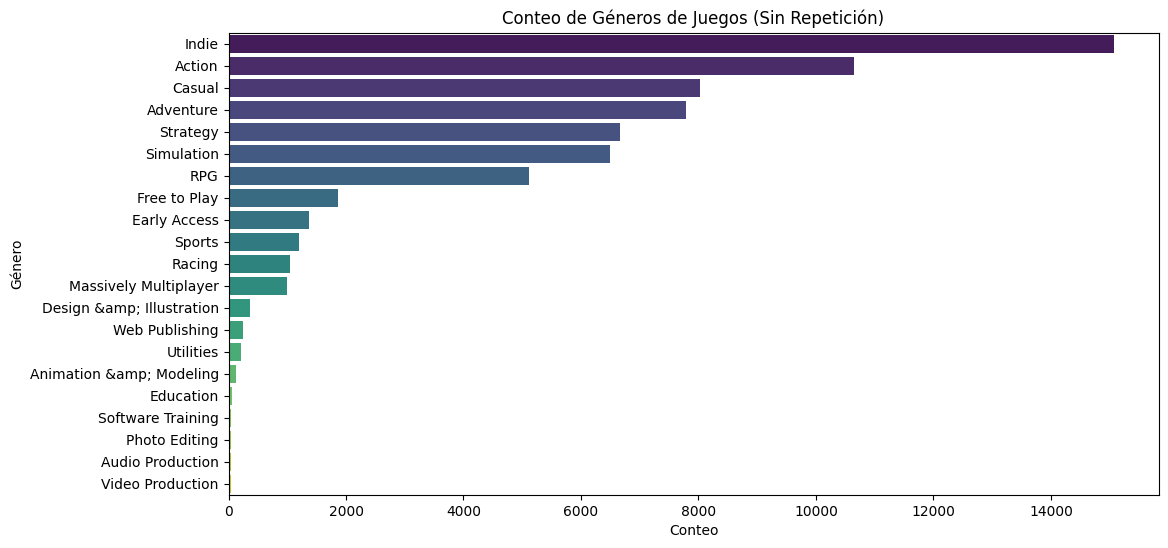

In [33]:
# Obtengo el conteo de géneros sin contar repeticiones
unique_genre_counts = df_genres['genres'].value_counts()

# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=unique_genre_counts.values, y=unique_genre_counts.index, palette='viridis')
plt.title('Conteo de Géneros de Juegos (Sin Repetición)')
plt.xlabel('Conteo')
plt.ylabel('Género')
plt.show()

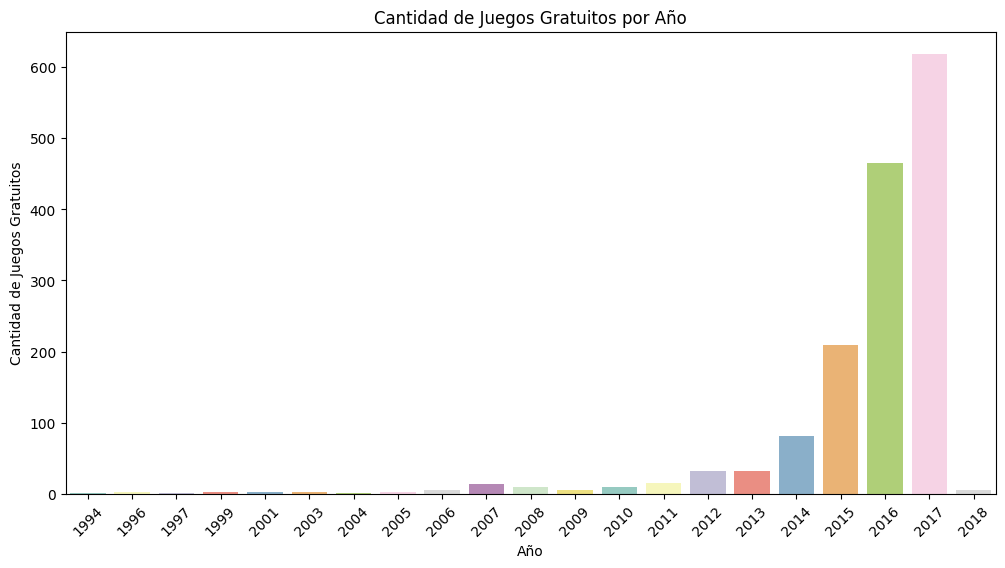

In [38]:
# Filtro los juegos que tienen un precio igual a 0 (gratuitos)
juegos_gratis = df_games[df_games['price'] == 0]

# Ordeno los datos por el año en orden ascendente
juegos_gratis = juegos_gratis.sort_values(by='anio')

# Creo un gráfico de barras
plt.figure(figsize=(12, 6))
sns.countplot(data=juegos_gratis, x='anio', palette='Set3')
plt.title('Cantidad de Juegos Gratuitos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Juegos Gratuitos')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para mayor legibilidad
plt.show()

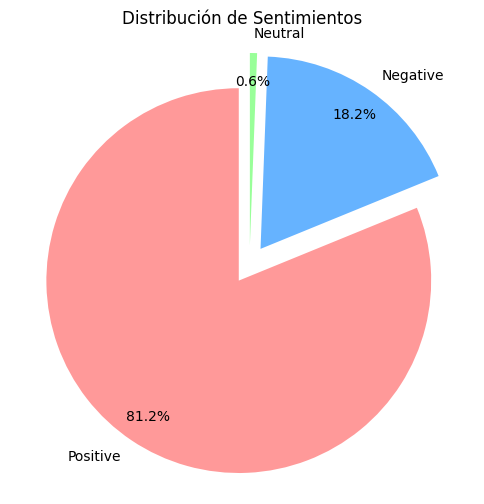

In [35]:
# Mapeo los valores de sentiment_analysis a etiquetas descriptivas
df_reviews['sentiment_labels'] = df_reviews['sentiment_analysis'].map({0: 'Negative', 1: 'Neutral', 2: 'Positive'})

# Cuento la cantidad de registros para cada valor en la columna sentiment_analysis
conteo_sentimientos = df_reviews['sentiment_labels'].value_counts()

# Etiquetas y valores para el gráfico de torta
etiquetas = conteo_sentimientos.index
valores = conteo_sentimientos.values

# Colores para cada sección de la torta
colores = ['#ff9999', '#66b3ff', '#99ff99']

# Explode para destacar una porción
explode = (0.1, 0.1, 0.1)

# Creo el gráfico de torta
plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, colors=colores, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode=explode)
plt.title('Distribución de Sentimientos')
plt.axis('equal')  # Hace que el gráfico de torta sea un círculo.
plt.show()